In [1]:
#相關係數應用
##DataFrame資料來源為dict
'''若DataFrame的資料來源為dict：pandas.DataFrame(data: dict[Any, Any])，
則系統會將dict中的key值預設為DataFrame的欄位名稱。'''

import pandas as pd

data = {"年廣告費投入": [12.5,15.3,23.2,26.4,33.5,34.4,39.4,45.2,55.4,60.9],
        "月均銷售額": [21.2,23.9,32.9,34.1,42.5,43.2,49.0,52.8,59.4,63.5]}
df1 = pd.DataFrame(data, index = range(2011,2021))  
df1

,年廣告費投入,月均銷售額
2011,12.5,21.2
2012,15.3,23.9
2013,23.2,32.9
2014,26.4,34.1
2015,33.5,42.5
2016,34.4,43.2
2017,39.4,49.0
2018,45.2,52.8
2019,55.4,59.4
2020,60.9,63.5


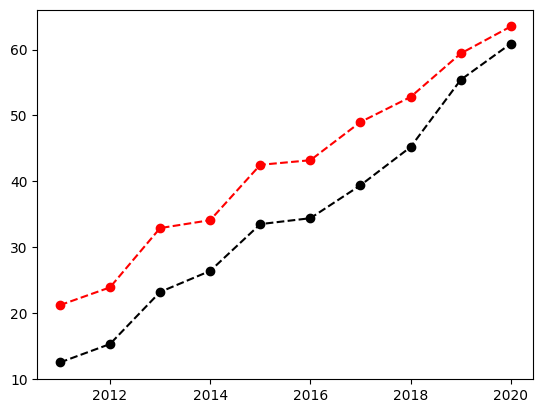

In [2]:
##以圖表表示相關性
import matplotlib.pyplot as plt

figure = plt.figure()  #建立圖像/畫布
axes = figure.add_subplot(111)   #(111)即(1, 1, 1)
axes.plot(df1.index, df1["年廣告費投入"].values, "ko--")
axes.plot(df1.index, df1["月均銷售額"].values, "ro--")
plt.show()

In [3]:
##相關係數
'''Series物件名稱.corr(other): Compute correlation with other Series, excluding missing values.
為一method，會回傳float，參數other為另一個Series，注意只能為Series。
也可加入參數method來指定要用甚麼方法計算相關係數，可為{'pearson', 'kendall', 'spearman'} or callable:
pearson : Standard correlation coefficient;
kendall : Kendall Tau correlation coefficient;
spearman : Spearman rank correlation;
callable: Callable with input two 1d ndarrays and returning a float.；
參數min_periods可指定最低樣本數(Minimum number of observations needed to have a valid result.)，注意只能為int。'''

correlation = df1["年廣告費投入"].corr(df1["月均銷售額"])
correlation

0.9941983762371884

In [4]:
#金融數據資料應用
##資料下載/抓取
'''pandas_datareader該外部package可讀取各種金融數據：
Up-to-date remote data access for pandas, works for multiple versions of pandas.
其中的data module為Module contains tools for collecting data from various remote sources。
另外，在開始抓取資料前可先匯入yfinace module: Download market data from Yahoo! Finance's API，
其中的pdr_override該function，用意是為了防止yahoo網站修改獲取歷史數據的API接口而導致get_data_yahoo方法無法使用，
yf.pdr_override(): make pandas datareader optional otherwise can be called via fix_yahoo_finance.download(...)。
接著即可透過pandas_datareader中get_data_yahoo()該function開始抓取數據資料，會回傳DataFrame或Series，
可加入參數「股票代碼」、「開始日期(start)」及「結束日期(end)」。
注意：在使用之前記得要先匯入。'''

import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()
data = pdr.get_data_yahoo("2330.TW", start = "2020-01-01")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,332.5,339.0,332.5,339.0,308.986298,31754120
2020-01-03,344.0,345.0,335.5,339.5,309.442108,41811268
2020-01-06,333.0,334.5,332.0,332.0,302.606018,45343057
2020-01-07,332.5,333.0,326.5,329.5,300.327332,50879181
2020-01-08,325.0,333.0,325.0,329.5,300.327332,37567748
...,...,...,...,...,...,...
2024-05-23,875.0,877.0,867.0,875.0,875.000000,37266618
2024-05-24,858.0,872.0,858.0,867.0,867.000000,34136382
2024-05-27,872.0,878.0,866.0,869.0,869.000000,26726954


In [5]:
##資料下載/抓取並建立dict來存放數據資料
for ticks in ["2330.TW", "2303.TW", "2454.TW", "2317.TW"]:
    print(ticks)

all_data = {ticks: pdr.get_data_yahoo(ticks, start = "2020-01-01") for ticks in ["2330.TW", "2303.TW", "2454.TW", "2317.TW"]}
all_data  #該dict裡面的型態為key: str及value: DataFrame


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

2330.TW
2303.TW
2454.TW
2317.TW



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'2330.TW':              Open   High    Low  Close   Adj Close    Volume
 Date                                                        
 2020-01-02  332.5  339.0  332.5  339.0  308.986298  31754120
 2020-01-03  344.0  345.0  335.5  339.5  309.441986  41811268
 2020-01-06  333.0  334.5  332.0  332.0  302.606049  45343057
 2020-01-07  332.5  333.0  326.5  329.5  300.327332  50879181
 2020-01-08  325.0  333.0  325.0  329.5  300.327332  37567748
 ...           ...    ...    ...    ...         ...       ...
 2024-05-23  875.0  877.0  867.0  875.0  875.000000  37266618
 2024-05-24  858.0  872.0  858.0  867.0  867.000000  34136382
 2024-05-27  872.0  878.0  866.0  869.0  869.000000  26726954
 2024-05-28  867.0  873.0  865.0  865.0  865.000000  25329216
 2024-05-29  861.0  868.0  856.0  857.0  857.000000  34772511
 
 [1069 rows x 6 columns],
 '2303.TW':                  Open       High        Low      Close  Adj Close     Volume
 Date                                                             

In [10]:
##查詢dict內容
'''可透過dict物件名稱.items()該method查詢dict裡面內容，會回傳a set-like object providing a view on dict's items。
Return a new view of the dictionary's items ((key, value) pairs).'''

for ticks,data in all_data.items():  #all_data該dict裡面的型態為key: str及value: DataFrame
    print(ticks)
    print(data)

2330.TW
             Open   High    Low  Close   Adj Close    Volume
Date                                                        
2020-01-02  332.5  339.0  332.5  339.0  308.986298  31754120
2020-01-03  344.0  345.0  335.5  339.5  309.441986  41811268
2020-01-06  333.0  334.5  332.0  332.0  302.606049  45343057
2020-01-07  332.5  333.0  326.5  329.5  300.327332  50879181
2020-01-08  325.0  333.0  325.0  329.5  300.327332  37567748
...           ...    ...    ...    ...         ...       ...
2024-05-23  875.0  877.0  867.0  875.0  875.000000  37266618
2024-05-24  858.0  872.0  858.0  867.0  867.000000  34136382
2024-05-27  872.0  878.0  866.0  869.0  869.000000  26726954
2024-05-28  867.0  873.0  865.0  865.0  865.000000  25329216
2024-05-29  861.0  868.0  856.0  857.0  857.000000  34772511

[1069 rows x 6 columns]
2303.TW
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  

In [12]:
##選取想要的數據資料並將其轉換為DataFrame
display({ticks: data["Adj Close"] for ticks,data in all_data.items()})  #all_data該dictvalue值型態為DataFrame，故value可用subscript[]取值，取出後即為Series
df2 = pd.DataFrame({ticks:data["Adj Close"] for ticks,data in all_data.items()})  #建立DataFrame的資料來源為dict型態，注意此DataFrame的Index即的all_data的Index
df2

{'2330.TW': Date
 2020-01-02    308.986298
 2020-01-03    309.441986
 2020-01-06    302.606049
 2020-01-07    300.327332
 2020-01-08    300.327332
                  ...    
 2024-05-23    875.000000
 2024-05-24    867.000000
 2024-05-27    869.000000
 2024-05-28    865.000000
 2024-05-29    857.000000
 Name: Adj Close, Length: 1069, dtype: float64,
 '2303.TW': Date
 2020-01-02    13.364813
 2020-01-03    13.162926
 2020-01-06    12.961041
 2020-01-07    12.920665
 2020-01-08    12.718781
                 ...    
 2024-05-23    56.000000
 2024-05-24    54.599998
 2024-05-27    56.599998
 2024-05-28    56.400002
 2024-05-29    55.900002
 Name: Adj Close, Length: 1069, dtype: float64,
 '2454.TW': Date
 2020-01-02     333.562164
 2020-01-03     328.273499
 2020-01-06     320.340546
 2020-01-07     321.851593
 2020-01-08     325.251434
                  ...     
 2024-05-23    1205.000000
 2024-05-24    1195.000000
 2024-05-27    1285.000000
 2024-05-28    1310.000000
 2024-05-29    1290.00

,2330.TW,2303.TW,2454.TW,2317.TW
Date,,,,
2020-01-02,308.986298,13.364813,333.562164,75.553650
2020-01-03,309.441986,13.162926,328.273499,76.219315
2020-01-06,302.606049,12.961041,320.340546,75.304024
2020-01-07,300.327332,12.920665,321.851593,74.139091
2020-01-08,300.327332,12.718781,325.251434,71.975670
...,...,...,...,...
2024-05-23,875.000000,56.000000,1205.000000,173.000000
2024-05-24,867.000000,54.599998,1195.000000,176.000000
2024-05-27,869.000000,56.599998,1285.000000,185.000000


In [13]:
##更改欄位名稱
'''可透過rename此method來重新命名欄位名稱或index。
DataFrame物件名稱.rename() --> DataFrame or None: Rename columns or index labels. Function / dict values must be unique (1-to-1). 
Labels not contained in a dict / Series will be left as-is. Extra labels listed don't throw an error.
可加入參數mapper來指定要重新命名的column/index及新的名稱。可為dict-like or function。
mapper: Dict-like or function transformations to apply to that axis' values. 
Use either mapper and axis to specify the axis to target with mapper, or index and columns.
參數axis可指定為對'index'/0或'columns'/1執行(Axis to target with mapper.)，預設為0。
參數replace可指定是否覆蓋原DataFrame，為bool，預設為False。
replace: Whether to modify the DataFrame rather than creating a new one. If True then value of copy is ignored.'''

df2.rename({"2330.TW":"台積電", "2303.TW":"聯電", "2454.TW":"聯發科", "2317.TW":"鴻海"}, axis = 1, inplace = True)
df2

,台積電,聯電,聯發科,鴻海
Date,,,,
2020-01-02,308.986298,13.364813,333.562164,75.553650
2020-01-03,309.441986,13.162926,328.273499,76.219315
2020-01-06,302.606049,12.961041,320.340546,75.304024
2020-01-07,300.327332,12.920665,321.851593,74.139091
2020-01-08,300.327332,12.718781,325.251434,71.975670
...,...,...,...,...
2024-05-23,875.000000,56.000000,1205.000000,173.000000
2024-05-24,867.000000,54.599998,1195.000000,176.000000
2024-05-27,869.000000,56.599998,1285.000000,185.000000


In [14]:
##差距計算
'''可透過diff或pct_change此兩種method來計算資料間的差距，皆會回傳DataFrame。
DataFrame物件名稱.diff(periods = 1, axis = 0): First discrete difference of element. Calculates the difference 
of a DataFrame element compared with another element in the DataFrame (default is element in previous row).
可加入參數periods來指定向下平移的欄位數(Periods to shift for calculating difference, accepts negative values.)，
注意只能為int，預設為1；
參數axis可指定是針對'index'/0或'columns'/1執行計算，預設為0。
另外pandas.Series.diff()用法相同，但沒有參數axis。

DataFrame物件名稱.pct_change(): Fractional change between the current and a prior element.
Computes the fractional change from the immediately previous row by default. 
This is useful in comparing the fraction of change in a time series of elements.
可加入參數periods: Periods to shift for forming percent change.注意只能為int，預設為1。
另外pandas.Series.pct_change()用法相同。

pandas.DataFrame.corr()為一method --> DataFrame(Correlation matrix): Compute pairwise correlation of columns, excluding NA/null values.
可加入參數metnhod: {'pearson', 'kendall', 'spearman'} or callable指定計算方法，預設為'pearson'：
pearson : standard correlation coefficient,
kendall : Kendall Tau correlation coefficient,
spearman : Spearman rank correlation,
callable: callable with input two 1d ndarrays；
參數min_periods可指定每組至少需要多少觀察值，注意只能為int。
Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.；
參數numeric_only可指定是否只允許int、float以及bool(Include only float, int or boolean data.注意：只能為bool，預設為False。'''

df3 = df2.pct_change().iloc[1:]  #第一列的值皆為NaN(沒有前一列可進行差距計算)，故不抓取第一列
display(df3)
df4 = df2.diff(axis = 0).iloc[1:]  #第一列的值皆為NaN(沒有前一列可進行差距計算)，故不抓取第一列
display(df4)
display(df3.corr())

,台積電,聯電,聯發科,鴻海
Date,,,,
2020-01-03,0.001475,-0.015106,-0.015855,0.008810
2020-01-06,-0.022091,-0.015337,-0.024166,-0.012009
2020-01-07,-0.007530,-0.003115,0.004717,-0.015470
2020-01-08,0.000000,-0.015625,0.010563,-0.029181
2020-01-09,0.024280,0.019047,0.015099,0.006936
...,...,...,...,...
2024-05-23,0.012731,0.018182,0.016878,0.023669
2024-05-24,-0.009143,-0.025000,-0.008299,0.017341
2024-05-27,0.002307,0.036630,0.075314,0.051136


,台積電,聯電,聯發科,鴻海
Date,,,,
2020-01-03,0.455688,-0.201887,-5.288666,0.665665
2020-01-06,-6.835938,-0.201884,-7.932953,-0.915291
2020-01-07,-2.278717,-0.040377,1.511047,-1.164932
2020-01-08,0.000000,-0.201884,3.399841,-2.163422
2020-01-09,7.291809,0.242261,4.910858,0.499245
...,...,...,...,...
2024-05-23,11.000000,1.000000,20.000000,4.000000
2024-05-24,-8.000000,-1.400002,-10.000000,3.000000
2024-05-27,2.000000,2.000000,90.000000,9.000000


,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.515940,0.534968,0.393103
聯電,0.515940,1.000000,0.439523,0.342512
聯發科,0.534968,0.439523,1.000000,0.362005
鴻海,0.393103,0.342512,0.362005,1.000000


In [16]:
#樞紐分析
##建立多個索引index的Series
'''樞紐分析：改變欄位columns和索引index呈現的位置。
以前建立的Series皆為單一索引index，即只有一欄index，
若是想要有多欄索引index也可以，此時有多個index的Series就會是二維資料，稱為堆疊資料stack，或稱長資料。
注意：雖然為二維資料，但和DataFrame此種有index和column的表格資料不同，這類的表格資料稱為非堆疊資料unstack，或稱寬資料。
另外，多維資料中的index及columns的加總又可稱為階層levels，如二維資料即2 levels'''

import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randn(9), index = ['a','a','a','b','b','c','c','d','d'])  #單一索引index
'''randn()為一function，可隨機產生常態分佈的值，若沒有給參數則回傳一float值；若有指定參數(int值)則回傳總共int列的ndarray。'''
display(series1)
series2 = pd.Series(np.random.randn(9),index = [['a','a','a','b','b','c','c','d','d'],
                                                [1,2,3,1,2,3,1,2,3]])  #透過二維list建立兩個索引index，注意：index的值數量需符合內容值/資料值得數量
display(series2)
display(series2.index)  #查詢索引index，會顯示為MultiIndex(兩個階層levels/index)

'''以此處的Series2來做長資料及寬資料(表格)的說明：
若為長資料時，因其為堆疊資料(一筆一筆新增堆疊)，故每一層index的資料筆數不一定會相同，如a索引就有3筆資，而其餘的b、c及d則只有兩筆。
然而，若是將這些資料值代入表格中，如index為a,b,c,d而columns為1,2,3情況下，總共需要4*3個資料值才能完整呈現表格，
此處只有9筆資料，雖然依然可以轉換，但就會有缺失值的出現(如下)。由此可知長資料及寬資料雖然都為二維資料，但是是完全不同存在。
在應用上，若是想抓取會新增筆數的資料，如每天的股票數據等，則建議使用長資料，可逐筆新增資料外，也不容易有缺失值。
另外，可透過unstack此method將有多重索引MultiIndex的Series轉換為DataFrame，會回傳DataFrame。
Series物件名稱.unstack(): Unstack, also known as pivot, Series with MultiIndex to produce DataFrame.
可加入參數level: Level(s) to unstack, can pass level name.可為int, str, or list of these，預設為last level/-1，
意思是在預設情況下系統會將最後一層的index設為columns來做出DataFrame；
參數fill_value可指定代替空值的值(Value to use when replacing NaN values.)，注意只能為scalar value，預設為None；
參數sort代表sort the level(s) in the resulting MultiIndex columns，為bool，預設為True。

另外DataFrame也可以用unstack()此method做unstack，
pandas.DataFrame.unstack() --> Series or DataFrame: Pivot a level of the (necessarily hierarchical) index labels.
Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).
可加入參數level: Level(s) of index to unstack, can pass level name.可為int, str, or list of these，預設為last level/-1；
參數fill_value可指定代替空值的值(Replace NaN with this value if the unstack produces missing values.)，可為int、str或dict；
參數sort代表sort the level(s) in the resulting MultiIndex columns，為bool，預設為True。'''
series2.unstack()  #表格資料


a   -0.143710
a   -0.043905
a   -0.886355
b   -0.235577
b    0.149761
c   -0.174985
c    0.935544
d   -0.802119
d    0.476436
dtype: float64

a  1    1.013532
   2    0.273877
   3    0.512659
b  1    0.092790
   2   -0.389582
c  3   -0.985103
   1    1.676915
d  2    0.474637
   3   -1.833586
dtype: float64

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('c', 3),
            ('c', 1),
            ('d', 2),
            ('d', 3)],
           )

,1,2,3
a,1.013532,0.273877,0.512659
b,0.092790,-0.389582,NaN
c,1.676915,NaN,-0.985103
d,NaN,0.474637,-1.833586


In [20]:
##多重索引的Series抓取資料
'''可透過discription[]來抓取想要的資料值，
注意：多個索引的話順序為由外而內，否則會顯示錯誤IndexError: invalid index to scalar variable.。'''

display(series2['a'])
display(series2['a'][1])

1    1.013532
2    0.273877
3    0.512659
dtype: float64

1.0135322590440952

In [21]:
##index命名(level)
'''可透過Series.index中的names此property來為index命名，
注意：命名的數量需符合該Series的index的數量。
注意：多階層levels的資料表一律建議要設定index和columns的名稱。'''

series2.index.names = ["分類", "數值"]
display(series2)

series2.unstack(level = "分類")  #指定「分類」index為column

分類  數值
a   1     1.013532
    2     0.273877
    3     0.512659
b   1     0.092790
    2    -0.389582
c   3    -0.985103
    1     1.676915
d   2     0.474637
    3    -1.833586
dtype: float64

分類,a,b,c,d
數值,,,,
1,1.013532,0.092790,1.676915,NaN
2,0.273877,-0.389582,NaN,0.474637
3,0.512659,NaN,-0.985103,-1.833586


In [23]:
#四維表格資料
##建立四維表格資料
'''表格資料DataFrame也可建立多重index及多重columns，以此來構成多維的表格資料。
如此處的frame有兩個index及兩個columns，故frame為一四維(2*2)表格資料。'''

frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                     index = [['a','a','b','b'], [1,2,1,2]],
                     columns = [["台北","台北","台中"], ["Green","Red","Green"]])  #四個levels(兩index兩columns)
display(frame)
display(frame.index)
display(frame.columns)

台北        台中
    Green Red Green
a 1     0   1     2
  2     3   4     5
b 1     6   7     8
  2     9  10    11

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

MultiIndex([('台北', 'Green'),
            ('台北',   'Red'),
            ('台中', 'Green')],
           )

In [24]:
##index及欄位名稱命名(levels)
frame.index.names = ["key1","key2"]
frame.columns.names = ["縣市","顏色"]
display(frame)

縣市           台北        台中
顏色        Green Red Green
key1 key2                
a    1        0   1     2
     2        3   4     5
b    1        6   7     8
     2        9  10    11

In [25]:
##轉換為堆疊資料
'''可透過stack此method將DataFrame進行stack(將column轉為index)，會回傳DataFrame或Series，
注意一個stack()只能將一個column，預設為-1(最後那層)，轉為index，故若有多層level可將stack()做串接使用。
DataFrame物件名稱.stack() --> DataFrame or Series: Stack the prescribed level(s) from columns to index.
Return a reshaped DataFrame or Series having a multi-level index with one or more new inner-most levels compared to 
the current DataFrame. The new inner-most levels are created by pivoting the columns of the current dataframe:
if the columns have a single level, the output is a Series;
if the columns have multiple levels, the new index level(s) is (are) taken from the prescribed level(s) and the output is a DataFrame.
可加入參數level來指定要轉換為index的column，可為int, str, list，預設為-1，注意：若為list，系統會依list的順序來轉換。
Level(s) to stack from the column axis onto the index axis, defined as one index or label, or a list of indices or labels.
注意：stack和unstack此兩種method皆是回傳一新DataFrame或Series，原DataFrame或Series不會變；
參數dropna可指定當某列中有遺失值時是否移除該列，為bool，預設為True，
Whether to drop rows in the resulting Frame/Series with missing values. 
Stacking a column level onto the index axis can create combinations of index and column values that are missing from the original dataframe.；
參數sort代表whether to sort the levels of the resulting MultiIndex，為bool，預設為True。'''

display(frame.stack())
display(frame.stack().stack())
display(frame.stack(level = "縣市"))
display(frame.stack(level = ["縣市","顏色"]))
display(frame.stack(level = ["縣市","顏色"]).unstack(level = ["顏色","key1"]))

/tmp/ipykernel_1073/1946930751.py:17: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  display(frame.stack())


縣市               台北    台中
key1 key2 顏色             
a    1    Green   0   2.0
          Red     1   NaN
     2    Green   3   5.0
          Red     4   NaN
b    1    Green   6   8.0
          Red     7   NaN
     2    Green   9  11.0
          Red    10   NaN

/tmp/ipykernel_1073/1946930751.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  display(frame.stack().stack())


key1  key2  顏色     縣市
a     1     Green  台北     0.0
                   台中     2.0
            Red    台北     1.0
      2     Green  台北     3.0
                   台中     5.0
            Red    台北     4.0
b     1     Green  台北     6.0
                   台中     8.0
            Red    台北     7.0
      2     Green  台北     9.0
                   台中    11.0
            Red    台北    10.0
dtype: float64

/tmp/ipykernel_1073/1946930751.py:19: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  display(frame.stack(level = "縣市"))


顏色            Green   Red
key1 key2 縣市             
a    1    台中      2   NaN
          台北      0   1.0
     2    台中      5   NaN
          台北      3   4.0
b    1    台中      8   NaN
          台北      6   7.0
     2    台中     11   NaN
          台北      9  10.0

/tmp/ipykernel_1073/1946930751.py:20: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  display(frame.stack(level = ["縣市","顏色"]))


key1  key2  縣市  顏色   
a     1     台中  Green     2.0
            台北  Green     0.0
                Red       1.0
      2     台中  Green     5.0
            台北  Green     3.0
                Red       4.0
b     1     台中  Green     8.0
            台北  Green     6.0
                Red       7.0
      2     台中  Green    11.0
            台北  Green     9.0
                Red      10.0
dtype: float64

/tmp/ipykernel_1073/1946930751.py:21: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  display(frame.stack(level = ["縣市","顏色"]).unstack(level = ["顏色","key1"]))


顏色      Green  Red Green   Red
key1        a    a     b     b
key2 縣市                       
1    台中   2.0  NaN   8.0   NaN
     台北   0.0  1.0   6.0   7.0
2    台中   5.0  NaN  11.0   NaN
     台北   3.0  4.0   9.0  10.0